<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Unit_5_Lesson_5_Project_4_Final_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind, ttest_rel, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
raw = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
raw.shape

(8594, 13)

In [0]:
data = raw.dropna()

In [5]:
data.shape

(8147, 13)

					Distribution of Trust


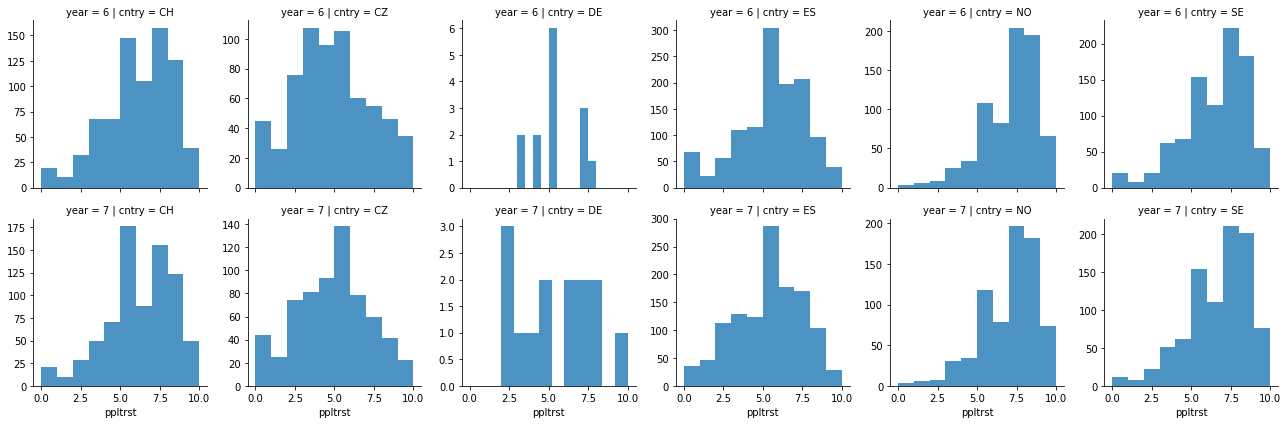

Shapiro Tests
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [6]:
g = sns.FacetGrid(raw, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('\t\t\t\t\tDistribution of Trust')
plt.show()

cntrys = list(raw.cntry.unique())
years = [6,7]
print('Shapiro Tests')
for cnt in cntrys:
    temp = raw[raw.cntry ==cnt].dropna()
    for year in years:
        print(cnt, year, shapiro(temp[temp.year ==year].ppltrst))
    print()

In [38]:
print('Wilcoxon Reults are below:')
for cnt in cntrys:
    
    pdtemp = raw[raw.cntry ==cnt]
    
    print(cnt, wilcoxon(pdtemp[pdtemp.year == 6].happy, y=pdtemp[pdtemp.year == 7].happy))
    print()

Wilcoxon Reults are below:
CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


	Happiness from 2012-2014 for Six European Countries


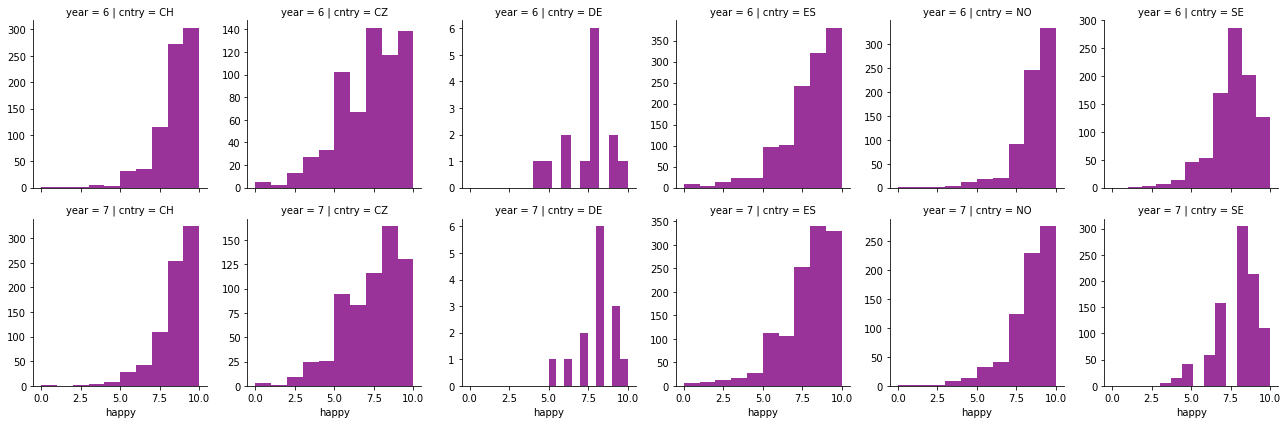

Shapiro Tests
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [8]:
g = sns.FacetGrid(raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='purple')

print('\tHappiness from 2012-2014 for Six European Countries')
plt.show()

cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro Tests')
for cnt in cntrys:
    temp = data[data.cntry ==cnt]
    for year in years:
        print(cnt, year, shapiro(temp[temp.year ==year].happy))
    print()

In [9]:
print('Wilcoxon')
for cnt in cntrys:
    temp = raw[raw.cntry ==cnt]
    print(cnt, wilcoxon(temp[temp.year == 6].happy, y=temp[temp.year == 7].happy))
    print()


Wilcoxon
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [0]:
data2012 = raw[raw.year==6]

In [11]:
data2012['gndr'].value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

		TV Watching in 2012 about Men vs. Women


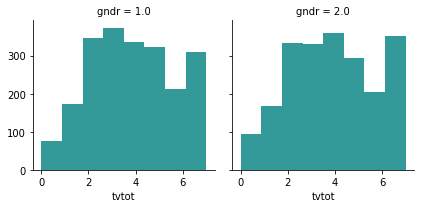

Males = 1.0: (0.9434293508529663, 5.994494507539187e-28)
Females = 2.0: (0.9390434622764587, 8.488309331265169e-29)


In [12]:
g = sns.FacetGrid(data2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='teal', bins=8)

print('\t\tTV Watching in 2012 about Men vs. Women')
plt.show()

print('Males = 1.0:', shapiro(data2012[data2012.gndr ==1].tvtot.dropna()))
print('Females = 2.0:', shapiro(data2012[data2012.gndr ==2].tvtot.dropna()))

In [13]:
print('Wilcoxon Test results are:', wilcoxon(data2012[data2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=data2012[data2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test results are: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


		Fairness for People who Live with Partner vs. without a Partner (2012)


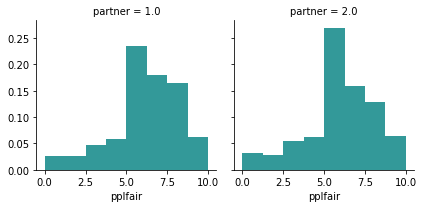

Lives with Partner = 1.0: (0.94523686170578, 2.068099309311279e-30)
Lives Alone = 2.0: (0.9332861304283142, 2.8958550733254737e-26)


In [14]:

g = sns.FacetGrid(data2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='teal', bins=8, normed=True)

print('\t\tFairness for People who Live with Partner vs. without a Partner (2012)')
plt.show()

print('Lives with Partner = 1.0:', shapiro(data2012[data2012.partner ==1].tvtot.dropna()))
print('Lives Alone = 2.0:', shapiro(data2012[data2012.partner ==2].tvtot.dropna()))

In [31]:
data2012[data2012.partner == 2].pplfair.dropna().count()

1608

In [30]:
print('The Wilcoxon Test is:', wilcoxon(data2012[data2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=data2012[data2012.partner == 2].pplfair.dropna()))

The Wilcoxon Test is: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


In [34]:
print('The median for people living with partners is:', data2012[data2012.partner == 1].pplfair.median())
print('The median for people living without partners is:', data2012[data2012.partner == 2].pplfair.median())

The median for people living with partners is: 7.0
The median for people living without partners is: 6.0


In [15]:
print('Wilcoxon Test results are:', wilcoxon(data2012[data2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=data2012[data2012.partner == 2].pplfair.dropna()))

Wilcoxon Test results are: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


In [0]:
listing = ['CZ', 'DE', 'ES','NO']
co = raw[(raw.cntry.isin(listing)) & (raw.year == 7)]

		Social Meetings for CZ, DE, ES, NO (2014)


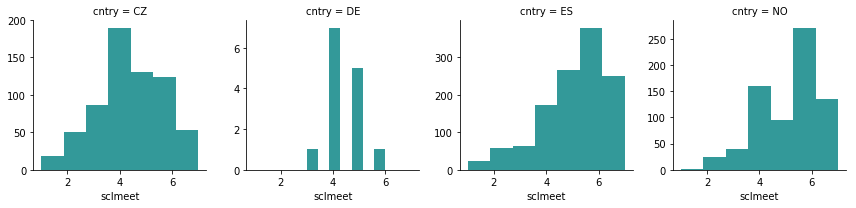

Shapiro Tests
CZ (0.9451602101325989, 7.663770300607355e-15)

DE (0.8616600036621094, 0.032099850475788116)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)



In [17]:
g = sns.FacetGrid(co, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='teal', bins=7)

print('\t\tSocial Meetings for CZ, DE, ES, NO (2014)')
plt.show()

cntrys = list(co.cntry.unique())
print('Shapiro Tests')
for cnt in cntrys:
    print(cnt, shapiro(co[co.cntry ==cnt].sclmeet.dropna()))
    print()

In [18]:
print('CZ vs DE:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'DE'].sclmeet.dropna()))
print('CZ vs ES:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))
print('DE vs ES:', ttest_ind(co[co.cntry == 'DE'].sclmeet.dropna(),
             co[co.cntry == 'ES'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(co[co.cntry == 'ES'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))
print('DE vs NO:', ttest_ind(co[co.cntry == 'DE'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))

CZ vs DE: Ttest_indResult(statistic=0.0433661445611368, pvalue=0.9654226437207307)
CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
DE vs ES: Ttest_indResult(statistic=-2.115791799094089, pvalue=0.03456418756613026)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
DE vs NO: Ttest_indResult(statistic=-2.4172026189301423, pvalue=0.0158801026958694)


		Social Activities for CZ, DE, ES, NO (2014)


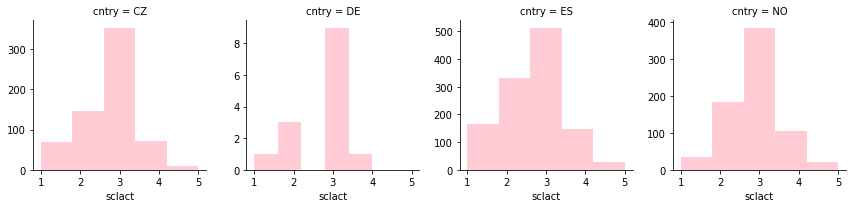

Shapiro Tests
CZ (0.8517600893974304, 3.2631608025549396e-24)

DE (0.7937105894088745, 0.004176934715360403)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)



In [36]:
g = sns.FacetGrid(co, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='pink', bins=5)

print('\t\tSocial Activities for CZ, DE, ES, NO (2014)')
plt.show()

cntrys = list(co.cntry.unique())
print('Shapiro Tests')
for cnt in cntrys:
    print(cnt, shapiro(co[co.cntry ==cnt].sclact.dropna()))
    print()

In [20]:
print('CZ vs DE:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'DE'].sclmeet.dropna()))
print('CZ vs ES:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(co[co.cntry == 'CZ'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))
print('DE vs ES:', ttest_ind(co[co.cntry == 'DE'].sclmeet.dropna(),
             co[co.cntry == 'ES'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(co[co.cntry == 'ES'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))
print('DE vs NO:', ttest_ind(co[co.cntry == 'DE'].sclmeet.dropna(),
             co[co.cntry == 'NO'].sclmeet.dropna()))

CZ vs DE: Ttest_indResult(statistic=0.0433661445611368, pvalue=0.9654226437207307)
CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
DE vs ES: Ttest_indResult(statistic=-2.115791799094089, pvalue=0.03456418756613026)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
DE vs NO: Ttest_indResult(statistic=-2.4172026189301423, pvalue=0.0158801026958694)


Answers to the Questions
1. In 2012-2014, Norway, Spain and the Czech Republic are the three countries whose trust in people changed. Therefore, we reject the null hypothesis for these countries.
2. Similar to Question 1, Norway, Spain, and Czech are the three countries whose happiness changed. Therefore, we reject the null hypothesis for these countries.
3. The p-value is 0.503, which is ten times more than the normal p-value. Therefore, we cannot reject the null hypothesis and conclude that there is zero difference between the habits of television among males and females.
4. People who did not live alone believed other people were fair than those who did live alone.

5. Based on the p-values,
The Czech Republic and Denmark are not significantly different from each other, just like Spain and Norway are not significantly different.
The Czech Republic is barely different from Spain and Norway unlike Denmark, which is significantly different from those two countries.

6. Based on the p-values,
The Czech Republic and Denmark are not significantly different from each other, just like Spain and Norway are not significantly different.
The Czech Republic is barely different from Spain and Norway unlike Denmark, which is significantly different from those two countries.